In [ ]:
import numpy as np

## Dataset Preprocessing

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

#### Loading the dataset

In [ ]:
dataset_path = '/content/Career_Switch_Prediction_Dataset.csv'

In [ ]:
df = pd.read_csv(dataset_path)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7892,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,NaN,1,114,1
4996,19768,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,64,1
4997,33180,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,>20,5000-9999,Pvt Ltd,>4,89,0
4998,13215,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,10000+,Pvt Ltd,>4,20,1


In [ ]:
# One-hot encode all categorical features in your dataset (excluding the target column)
encoded_df = pd.get_dummies(df.drop('will_change_career', axis=1))

# Add the target column back
encoded_df['will_change_career'] = df['will_change_career']

# Calculate correlation matrix
correlation_matrix = encoded_df.corr()

# Display the correlation matrix
correlation_matrix


,enrollee_id,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_0,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,will_change_career
enrollee_id,1.000000,-0.039610,-0.004381,0.016484,-0.024456,-0.037953,-0.008582,-0.031225,0.029204,-0.015292,...,0.002504,0.008406,-0.034466,-0.014145,0.041315,0.002500,-0.001434,-0.004412,-0.025025,0.049445
city_development_index,-0.039610,1.000000,0.004717,0.004066,0.036423,0.059606,-0.150718,-0.030401,0.407409,0.102220,...,0.012228,0.059861,0.044280,-0.136557,-0.048745,0.036188,0.028610,0.046971,0.137691,-0.346808
training_hours,-0.004381,0.004717,1.000000,-0.018423,-0.000770,-0.016727,0.006823,0.017154,0.021358,0.008332,...,0.020042,-0.022695,0.003181,-0.002839,-0.002225,-0.005814,0.010104,0.009932,-0.000134,-0.022170
city_city_1,0.016484,0.004066,-0.018423,1.000000,-0.001924,-0.003585,-0.001924,-0.004144,-0.015578,-0.003743,...,-0.002123,-0.006070,-0.014717,0.009726,0.004657,-0.011952,0.024470,-0.006627,-0.012788,-0.000156
city_city_10,-0.024456,0.036423,-0.000770,-0.001924,1.000000,-0.008613,-0.004621,-0.009956,-0.037426,-0.008993,...,-0.005101,-0.000173,0.001596,-0.026648,0.014184,-0.003976,-0.003219,-0.002609,0.016533,-0.019087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
last_new_job_2,0.002500,0.036188,-0.005814,-0.011952,-0.003976,-0.017722,-0.012222,-0.015165,0.013104,-0.004379,...,-0.009266,0.034530,0.038988,-0.165579,-0.358552,1.000000,-0.101114,-0.098926,-0.190889,-0.009077
last_new_job_3,-0.001434,0.028610,0.010104,0.024470,-0.003219,0.012171,-0.016273,-0.010418,0.010382,-0.011286,...,-0.006127,-0.003980,0.068544,-0.093841,-0.203208,-0.101114,1.000000,-0.056066,-0.108186,-0.006915
last_new_job_4,-0.004412,0.046971,0.009932,-0.006627,-0.002609,-0.000780,-0.015921,0.003392,0.033099,0.017515,...,-0.005504,-0.015109,0.067393,-0.091810,-0.198810,-0.098926,-0.056066,1.000000,-0.105844,-0.024105
last_new_job_>4,-0.025025,0.137691,-0.000134,-0.012788,0.016533,-0.005976,-0.022846,-0.003003,0.072853,-0.010598,...,0.001794,0.051159,0.111427,-0.177158,-0.383628,-0.190889,-0.108186,-0.105844,1.000000,-0.041756


<ipython-input-84-86592d7b0ddf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index.astype(str), y=class_counts.values,palette='viridis' )


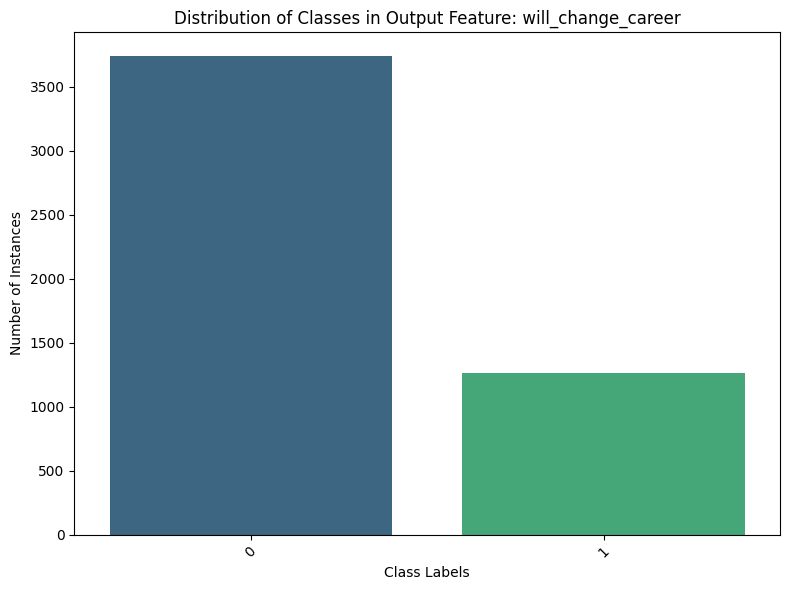

In [ ]:
# Count the number of instances for each class in the target column
class_counts = df['will_change_career'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values,palette='viridis' )
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('Distribution of Classes in Output Feature: will_change_career')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Dropping the irrelevant columns

In [ ]:
df = df.drop(['enrollee_id'], axis=1)


#### Handling null values

In [ ]:
null_values = df.isnull().sum()
print(null_values)


city                         0
city_development_index       0
gender                    1113
relevent_experience          0
enrolled_university        107
education_level            118
major_discipline           724
experience                  11
company_size              1571
company_type              1621
last_new_job               104
training_hours               0
will_change_career           0
dtype: int64


In [ ]:
df = df.dropna()
# Drop rows (where will_change_career) is missing
df = df.dropna(subset=['will_change_career'])

df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
8,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
11,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0


In [ ]:
null_values = df.isnull().sum()
print(null_values)


city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
will_change_career        0
dtype: int64


#### Encoding categorial variables

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [ ]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
1,59,0.776,1,1,2,0,5,6,3,5,5,47,0
4,40,0.767,1,0,2,1,5,21,3,1,4,8,0
7,65,0.762,1,0,2,0,5,4,6,5,5,18,1
8,5,0.920,1,0,2,0,5,17,3,5,1,46,1
11,5,0.920,1,0,2,0,5,15,5,5,1,108,0


#### Feature Scaling

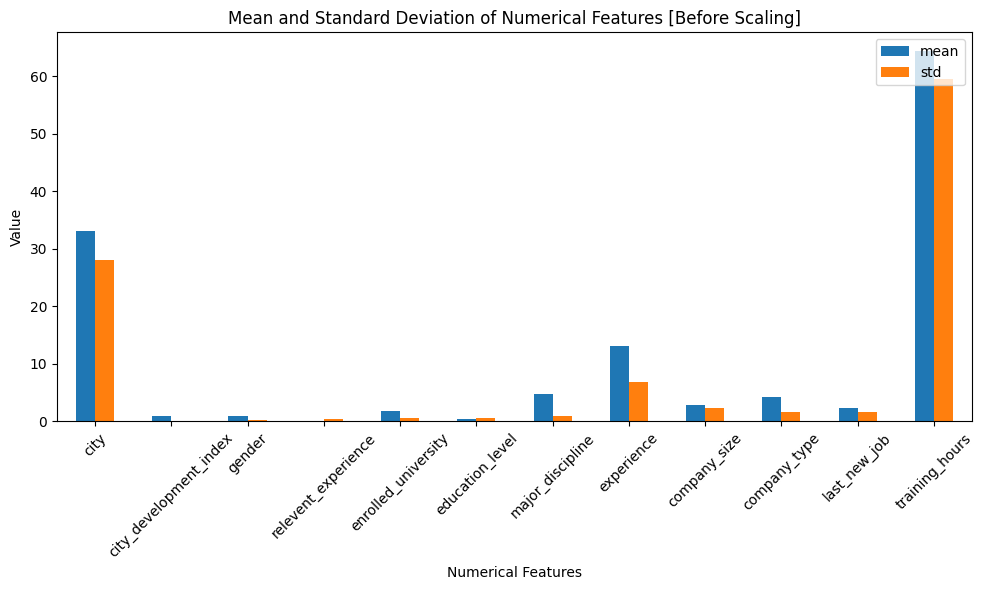

In [ ]:
# Drop target column to isolate numerical input features
numerical_features = df.drop(['will_change_career'], axis=1).select_dtypes(include=['int64', 'float64']).columns

# Calculate mean and standard deviation
numerical_stats = df[numerical_features].agg(['mean', 'std'])

# Plot
numerical_stats.transpose().plot(kind='bar', figsize=(10, 6))
plt.title('Mean and Standard Deviation of Numerical Features [Before Scaling]')
plt.ylabel('Value')
plt.xlabel('Numerical Features')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
X = df.drop('will_change_career', axis=1)
y = df['will_change_career']

# Apply scaling to input features
scaled_features = scaler.fit_transform(X)

# Reconstruct the DataFrame
final_df = pd.DataFrame(scaled_features, columns=X.columns)
final_df['will_change_career'] = y


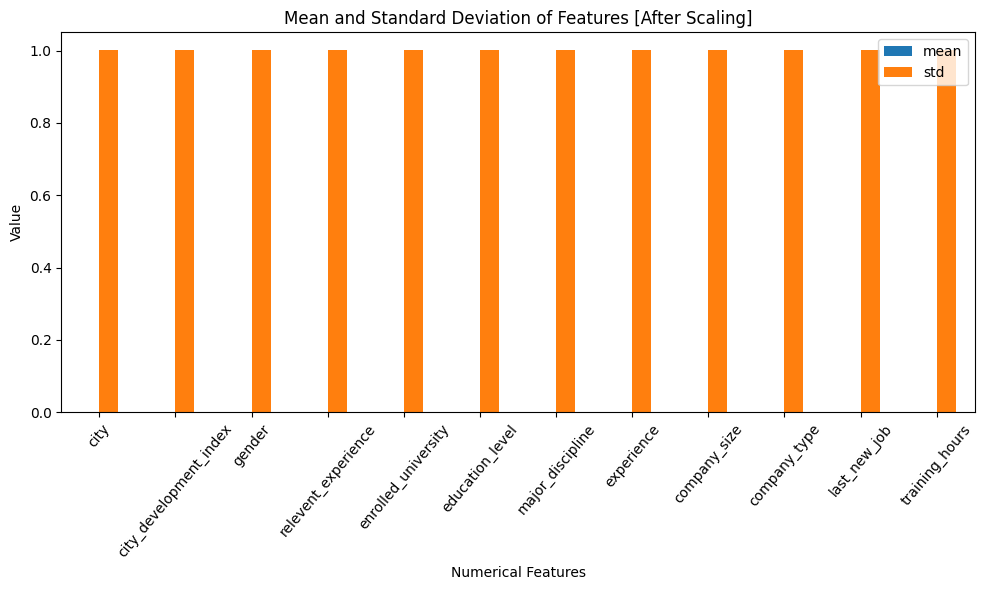

In [ ]:
numerical_features = final_df.drop(['will_change_career'], axis=1).select_dtypes(include=['int64', 'float64']).columns

# Compute mean and std
numerical_stats = final_df[numerical_features].agg(['mean', 'std'])

# Plot the result
numerical_stats.transpose().plot(kind='bar', figsize=(10, 6))
plt.title('Mean and Standard Deviation of Features [After Scaling]')
plt.ylabel('Value')
plt.xlabel('Numerical Features')
plt.xticks(rotation=50)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


#### Visualizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

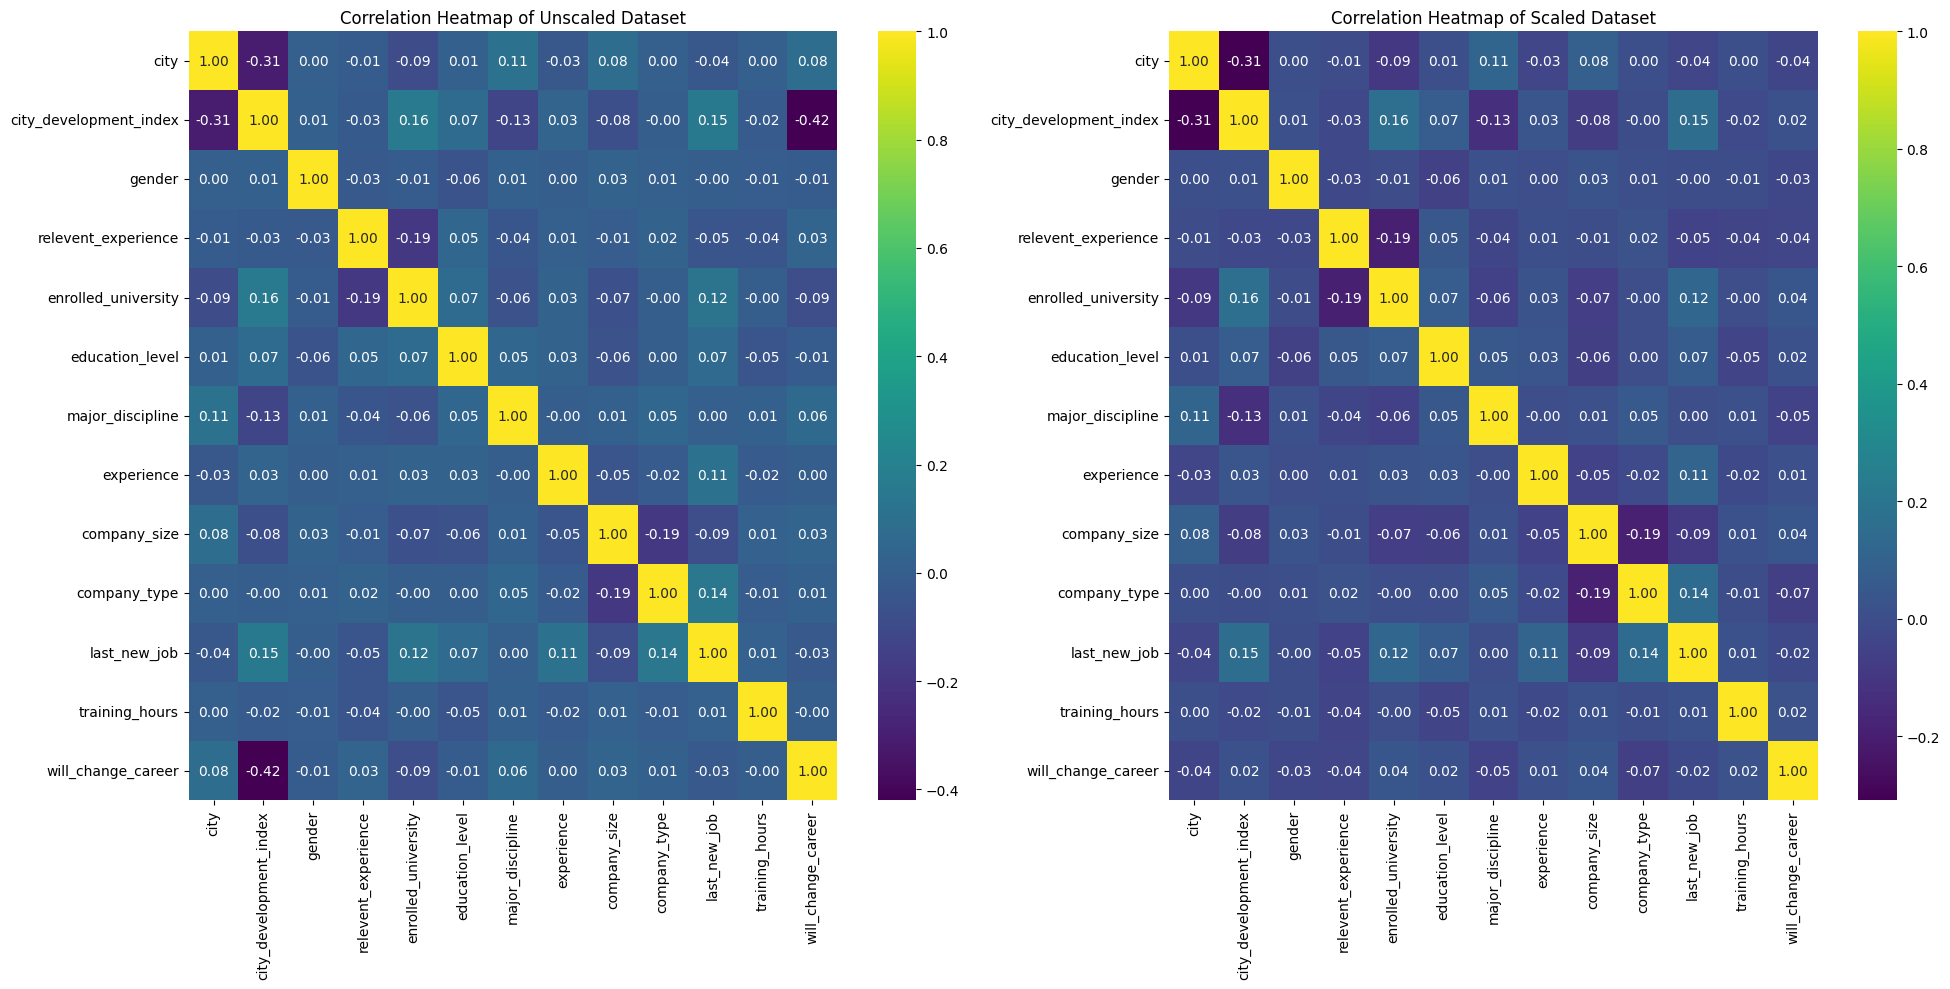

In [ ]:
plt.figure(figsize=(20, 10))

# Encoded (Unscaled) Dataset Visualization
plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap of Unscaled Dataset')

# Encoded (Scaled) Dataset Visualization
plt.subplot(1, 2, 2)
sns.heatmap(final_df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap of Scaled Dataset')

plt.tight_layout()
plt.show()

In [ ]:
# Drop any rows where the target is NaN
final_df = final_df.dropna(subset=['will_change_career'])



## Dataset splitting

In [ ]:
X = final_df.drop('will_change_career', axis=1)
y = final_df['will_change_career']

# 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


(((792, 12), (792,)), ((340, 12), (340,)))

## Model trainings

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


#### Logistic Regression

In [154]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the model
logistic_model = LogisticRegression(max_iter=5000)

# Train the model
print("Logistic Regression")
logistic_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_logistic = logistic_model.predict(X_test)
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate metrics
acc_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, zero_division=0)
recall_logistic = recall_score(y_test, y_pred_logistic, zero_division=0)
f1_logistic = f1_score(y_test, y_pred_logistic, zero_division=0)
roc_auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)  # ROC-AUC score uses probabilities

# Display results
print(f"Accuracy: {acc_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")
print(f"ROC-AUC Score: {roc_auc_logistic:.4f}")




Logistic Regression
Accuracy: 0.5471
Precision: 0.1745
Recall: 0.4561
F1-Score: 0.2524
ROC-AUC Score: 0.5318


#### Descision Tree

In [155]:
# Initialize
decision_tree_model =DecisionTreeClassifier(max_depth=10, min_samples_split=5, criterion='entropy')

# Train
print("Decision Tree")
decision_tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_prob_tree = decision_tree_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate
acc_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, zero_division=0)
recall_tree = recall_score(y_test, y_pred_tree, zero_division=0)
f1_tree = f1_score(y_test, y_pred_tree, zero_division=0)
roc_auc_tree = roc_auc_score(y_test, y_pred_prob_tree)  # ROC-AUC score uses probabilities

# Display results
print(f"Accuracy: {acc_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"Recall: {recall_tree:.4f}")
print(f"F1-Score: {f1_tree:.4f}")
print(f"ROC-AUC Score: {roc_auc_tree:.4f}")




Decision Tree
Accuracy: 0.7882
Precision: 0.2000
Recall: 0.0877
F1-Score: 0.1220
ROC-AUC Score: 0.5358


#### Neural Network

In [156]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
                          learning_rate='adaptive', max_iter=2000, early_stopping=True)

# Train the model with the SMOTE resampled data
mlp_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test)
y_pred_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC-AUC score

# Evaluate metrics
acc_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, zero_division=0)
recall_mlp = recall_score(y_test, y_pred_mlp, zero_division=0)
f1_mlp = f1_score(y_test, y_pred_mlp, zero_division=0)
roc_auc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)  # ROC-AUC score uses probabilities


# Display results
print("Neural Network (MLPClassifier)")
print(f"Accuracy: {acc_mlp:.4f}")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")
print(f"F1-Score: {f1_mlp:.4f}")
print(f"ROC-AUC Score: {roc_auc_mlp:.4f}")
print("\n")




Neural Network (MLPClassifier)
Accuracy: 0.6971
Precision: 0.1515
Recall: 0.1754
F1-Score: 0.1626
ROC-AUC Score: 0.4530




## Comparison Analysis of the models used

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

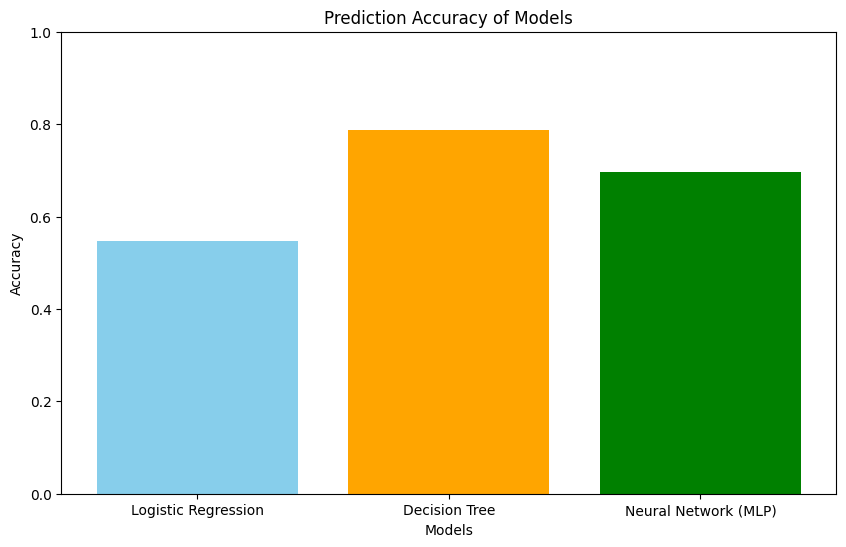

In [159]:

accuracies = {'Logistic Regression': acc_logistic,
              'Decision Tree': acc_tree,
              'Neural Network (MLP)': acc_mlp}
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['skyblue', 'orange', 'green'])
plt.title('Prediction Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.show()


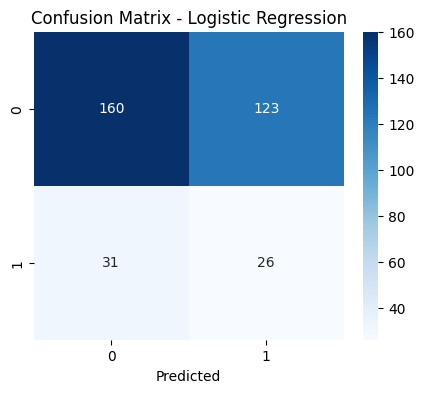

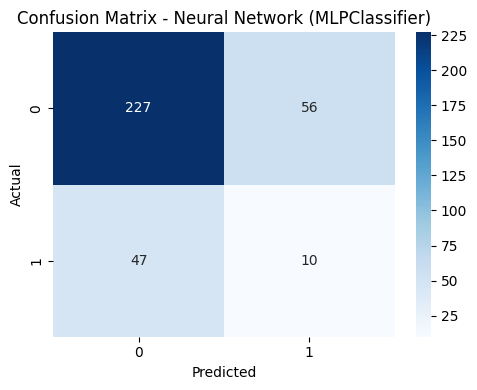

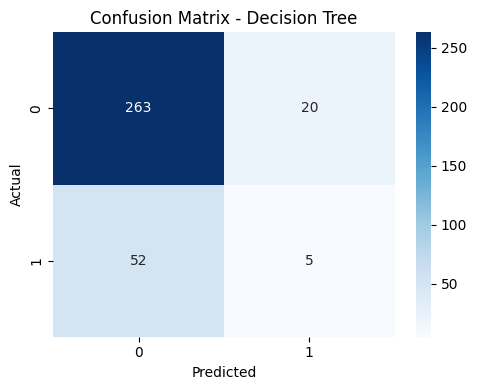

In [160]:

# Logistic Regression
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted')

# Neural Network (MLPClassifier
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Neural Network (MLPClassifier)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



# Confusion Matrix-Decision Tree
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

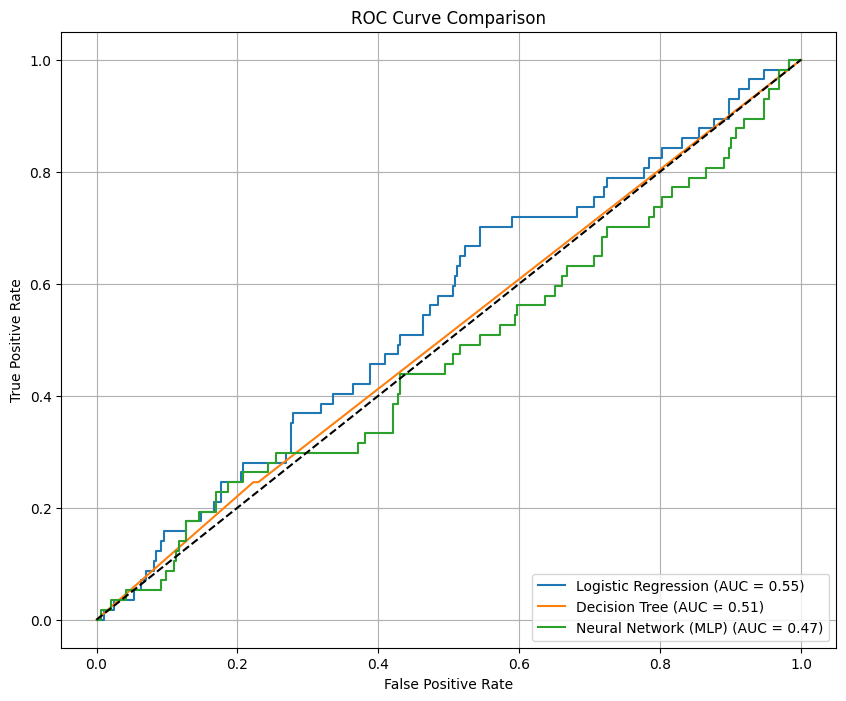

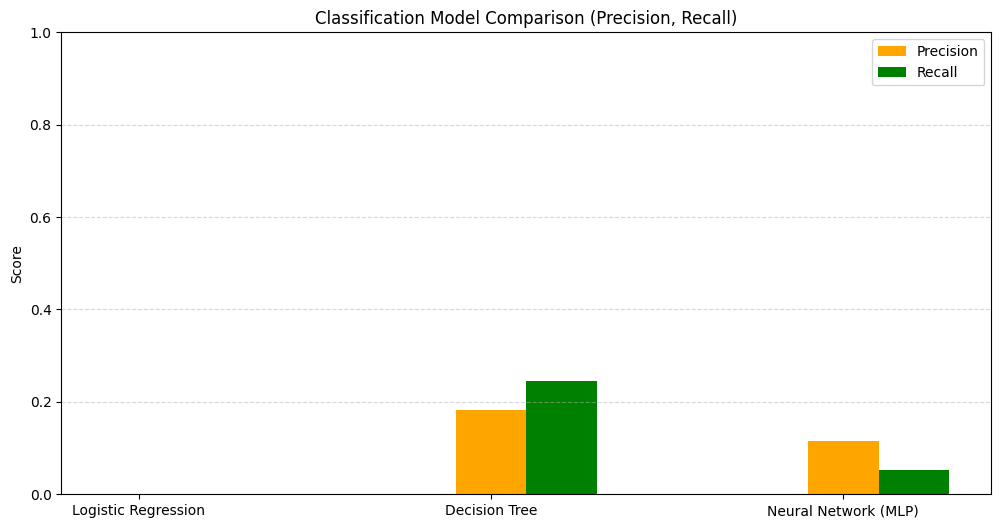

In [161]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve
)

#models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network (MLP)': MLPClassifier(max_iter=2000)
}

# results
accuracies, precisions, recalls, aucs = [], [], [], []

model_names = []

plt.figure(figsize=(10, 8))
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='binary', zero_division=0)
        rec = recall_score(y_test, y_pred, average='binary', zero_division=0)
        auc = roc_auc_score(y_test, y_proba)

        # Store
        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)
        aucs.append(auc)
        model_names.append(name)

        #ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')


    except Exception as e:
        print(f"[Skipping] {name} due to error: {e}")

#ROC Curve Plot
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Bar Chart of Precision, Recall
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x, precisions, width, label='Precision', color='orange')
ax.bar(x + width, recalls, width, label='Recall', color='green')

ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1)
ax.set_title('Classification Model Comparison (Precision, Recall)')
ax.set_ylabel('Score')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
